# Team 1 Final Project: Codon usage

## **ADS 504** | Mackenzie Carter, Jiaqi He, and Vicky van der Wagt

# 1. Preprocessing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings("ignore") #ignore warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import multilabel_confusion_matrix
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

In [2]:
#load dataset and remove missing values
codon_usage = pd.read_csv('/content/codon_usage.csv')
codon_usage.dropna(inplace=True)
codon_usage.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [3]:
codon_usage.DNAtype.unique()

array([ 0,  6,  4,  2,  1,  3,  7,  9,  5, 11, 12])

In [4]:
#replace DNAtype values with category names
DNAtype_dict = {
    0: "genomic",
    1: "mitochondrial",
    2: "chloroplast",
    3: "cyanelle",
    4: "plastid",
    5: "nucleomorph",
    6: "secondary_endosymbiont",
    7: "chromoplast",
    8: "leucoplast",
    9: "NA",
    10: "proplastid",
    11: "apicoplast",
    12: "kinetoplast"
}
codon_usage["DNAtype"] = codon_usage["DNAtype"].replace(DNAtype_dict)

Drop rows where the DNA type is NA because unknowns in our target variable are not relevant for analysis

In [ ]:
codon_usage = codon_usage[codon_usage['DNAtype'] != 'NA']

Check data type of each column. Columns UUU and UUC are expected to be floats, but are objects which indicates that there is incorrect text data. Additionally, DNA type is an integer although it is categorical

In [ ]:
codon_usage.dtypes.head()

Kingdom        object
DNAtype        object
SpeciesID       int64
Ncodons         int64
SpeciesName    object
dtype: object

In [ ]:
codon_usage["SpeciesID"] = codon_usage["SpeciesID"].astype("object")

Check for null values

In [ ]:
na_counts = codon_usage.isna().sum()
total_na_values = codon_usage.isna().sum().sum()
print("Total number of NA values in each column:")
print(na_counts)
print("Total number of NA values in entire dataframe (moreso sanity check):")
print(total_na_values)

Total number of NA values in each column:
Kingdom        0
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 69, dtype: int64
Total number of NA values in entire dataframe (moreso sanity check):
0


In [ ]:
names_and_indexes = []
for index, column_name in enumerate(codon_usage.columns):
    names_and_indexes.append((f"Index: {index}, Column Name: {column_name}"))

names_and_indexes = pd.DataFrame(names_and_indexes)
names_and_indexes.head()

,0
0,"Index: 0, Column Name: Kingdom"
1,"Index: 1, Column Name: DNAtype"
2,"Index: 2, Column Name: SpeciesID"
3,"Index: 3, Column Name: Ncodons"
4,"Index: 4, Column Name: SpeciesName"


Drop non-numeric data in columns UUU and UUC

In [ ]:
#convert column to numeric and then convert non-numeric values into NaN
codon_usage['UUU'] = pd.to_numeric(codon_usage['UUU'], errors='coerce')
codon_usage['UUC'] = pd.to_numeric(codon_usage['UUC'], errors='coerce')

#drop new NaNs
codon_usage.dropna(inplace=True)

Subset numerical columns

In [ ]:
#index locations of numerical columns
num_col_indexes = [3] + list(range(5, 69)) + [30]
#subset numerical columns
codon_usage_num = codon_usage.iloc[:, num_col_indexes]

Check for Correlations

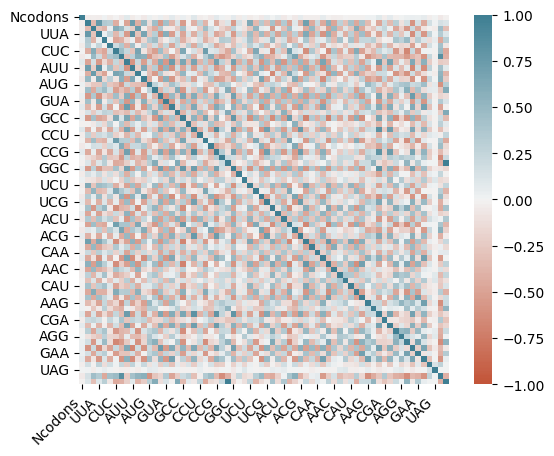

In [ ]:
corr = codon_usage_num.corr()

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Correlation Threshold

In [ ]:
corr_threshold = 0.8
high_correlations = corr[corr.abs() > corr_threshold]
#filter out the correlations between single variables to each other
mask = high_correlations.applymap(lambda x: x != 1.0)
#generate df highly_correlated_features that only contains features with high correlations, drop others
highly_correlated_features = high_correlations[mask].dropna(how='all', axis=0).dropna(how='all', axis=1)
len(highly_correlated_features)
print(highly_correlated_features)
#drop columns with high correlations
codon_usage = codon_usage.drop(columns=highly_correlated_features)

          UUA       CUA       AUU       GCG       CCG       CGC       UGA
UUA       NaN       NaN  0.821588       NaN       NaN       NaN       NaN
CUA       NaN       NaN       NaN       NaN       NaN       NaN  0.842418
AUU  0.821588       NaN       NaN       NaN       NaN       NaN       NaN
GCG       NaN       NaN       NaN       NaN  0.869527  0.827023       NaN
CCG       NaN       NaN       NaN  0.869527       NaN  0.810832       NaN
CGC       NaN       NaN       NaN  0.827023  0.810832       NaN       NaN
UGA       NaN  0.842418       NaN       NaN       NaN       NaN       NaN


In [ ]:
codon_usage.shape

(13024, 62)

## 2. EXPLORATORY DATA ANALYSIS (EDA)

### Basic Descriptive Statistics

In [ ]:
codon_usage.describe()

,Ncodons,UUU,UUC,UUG,CUU,CUC,CUG,AUC,AUA,AUG,...,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG
count,1.302400e+04,13024.000000,13024.000000,13024.000000,13024.000000,13024.000000,13024.000000,13024.000000,13024.000000,13024.000000,...,13024.000000,13024.000000,13024.000000,13024.000000,13024.000000,13024.000000,13024.000000,13024.000000,13024.000000,13024.000000
mean,7.962979e+04,0.024819,0.023439,0.014103,0.017822,0.018286,0.018450,0.025038,0.018296,0.021134,...,0.006963,0.005452,0.009929,0.006423,0.024181,0.021164,0.028292,0.021679,0.001640,0.000590
std,7.198102e+05,0.017628,0.011599,0.009280,0.010587,0.014574,0.016579,0.014597,0.016046,0.008161,...,0.004784,0.006602,0.008573,0.006388,0.013826,0.013040,0.014344,0.015015,0.001785,0.000882
min,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.602000e+03,0.013910,0.015380,0.007100,0.010890,0.007830,0.007180,0.015130,0.006320,0.015787,...,0.003340,0.001220,0.001690,0.001168,0.012387,0.011860,0.017360,0.009708,0.000560,0.000000
50%,2.929000e+03,0.021750,0.021900,0.013360,0.016130,0.014560,0.012795,0.021540,0.014145,0.022000,...,0.005990,0.003530,0.009270,0.004545,0.025425,0.019070,0.026095,0.020530,0.001380,0.000420
75%,9.120500e+03,0.031310,0.029210,0.019803,0.022730,0.025110,0.024302,0.031860,0.025972,0.026260,...,0.009850,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031112,0.002370,0.000830
max,4.066258e+07,0.217300,0.091690,0.101190,0.089780,0.100350,0.107370,0.088600,0.134400,0.101690,...,0.037040,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610


In [ ]:
codon_usage['DNAtype'].value_counts()

genomic                   9265
mitochondrial             2899
chloroplast                816
plastid                     31
kinetoplast                  5
cyanelle                     2
nucleomorph                  2
apicoplast                   2
secondary_endosymbiont       1
chromoplast                  1
Name: DNAtype, dtype: int64

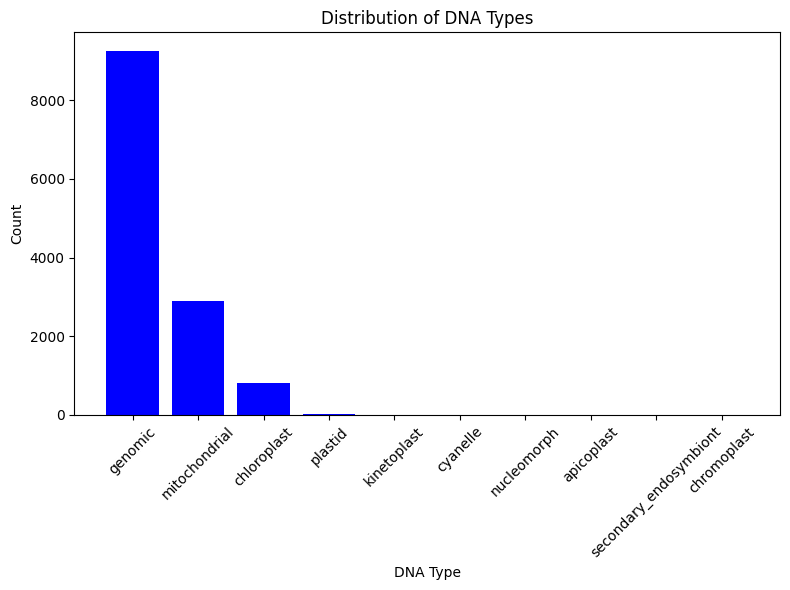

In [ ]:
value_counts = codon_usage['DNAtype'].value_counts()


plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values, color='blue')
plt.xlabel('DNA Type')
plt.ylabel('Count')
plt.title('Distribution of DNA Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

We have some imbalance between DNA types, which is to be expected and is not a cause for concern as a majority of species DNA is genomic, followed by mitochondrial DNA.

### Barplots, Boxplots, & Histograms

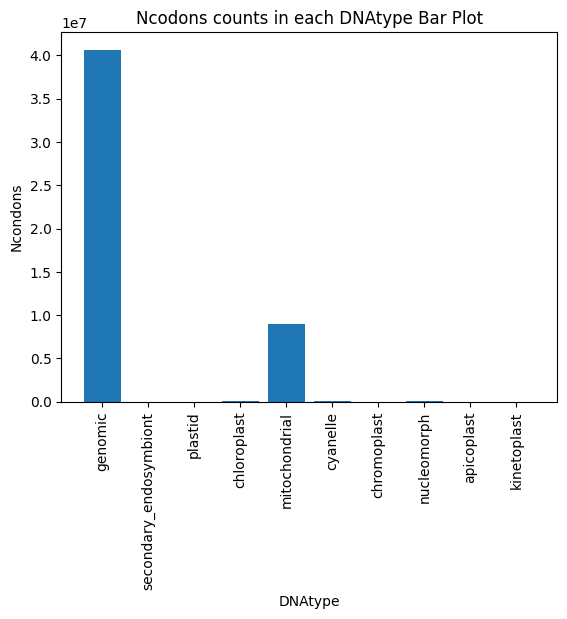

In [ ]:
plt.bar(codon_usage['DNAtype'],codon_usage['Ncodons'] )
plt.xlabel('DNAtype')
plt.ylabel('Ncondons')
plt.title('Ncodons counts in each DNAtype Bar Plot')

#MC EDIT TO ROTATE LABELS
plt.xticks(rotation=90)

plt.show()

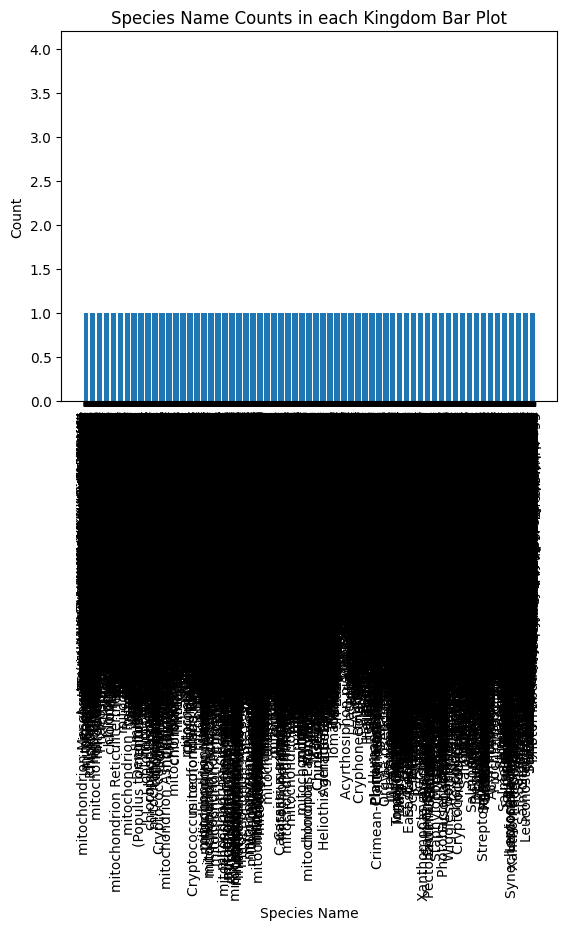

In [ ]:
species_counts = codon_usage['SpeciesName'].value_counts()
# Plot the bar plot
plt.bar(species_counts.index, species_counts.values)
plt.xlabel('Species Name')
plt.ylabel('Count')
plt.title('Species Name Counts in each Kingdom Bar Plot')
plt.xticks(rotation=90)  # To rotate x-axis labels for better visibility
plt.show()

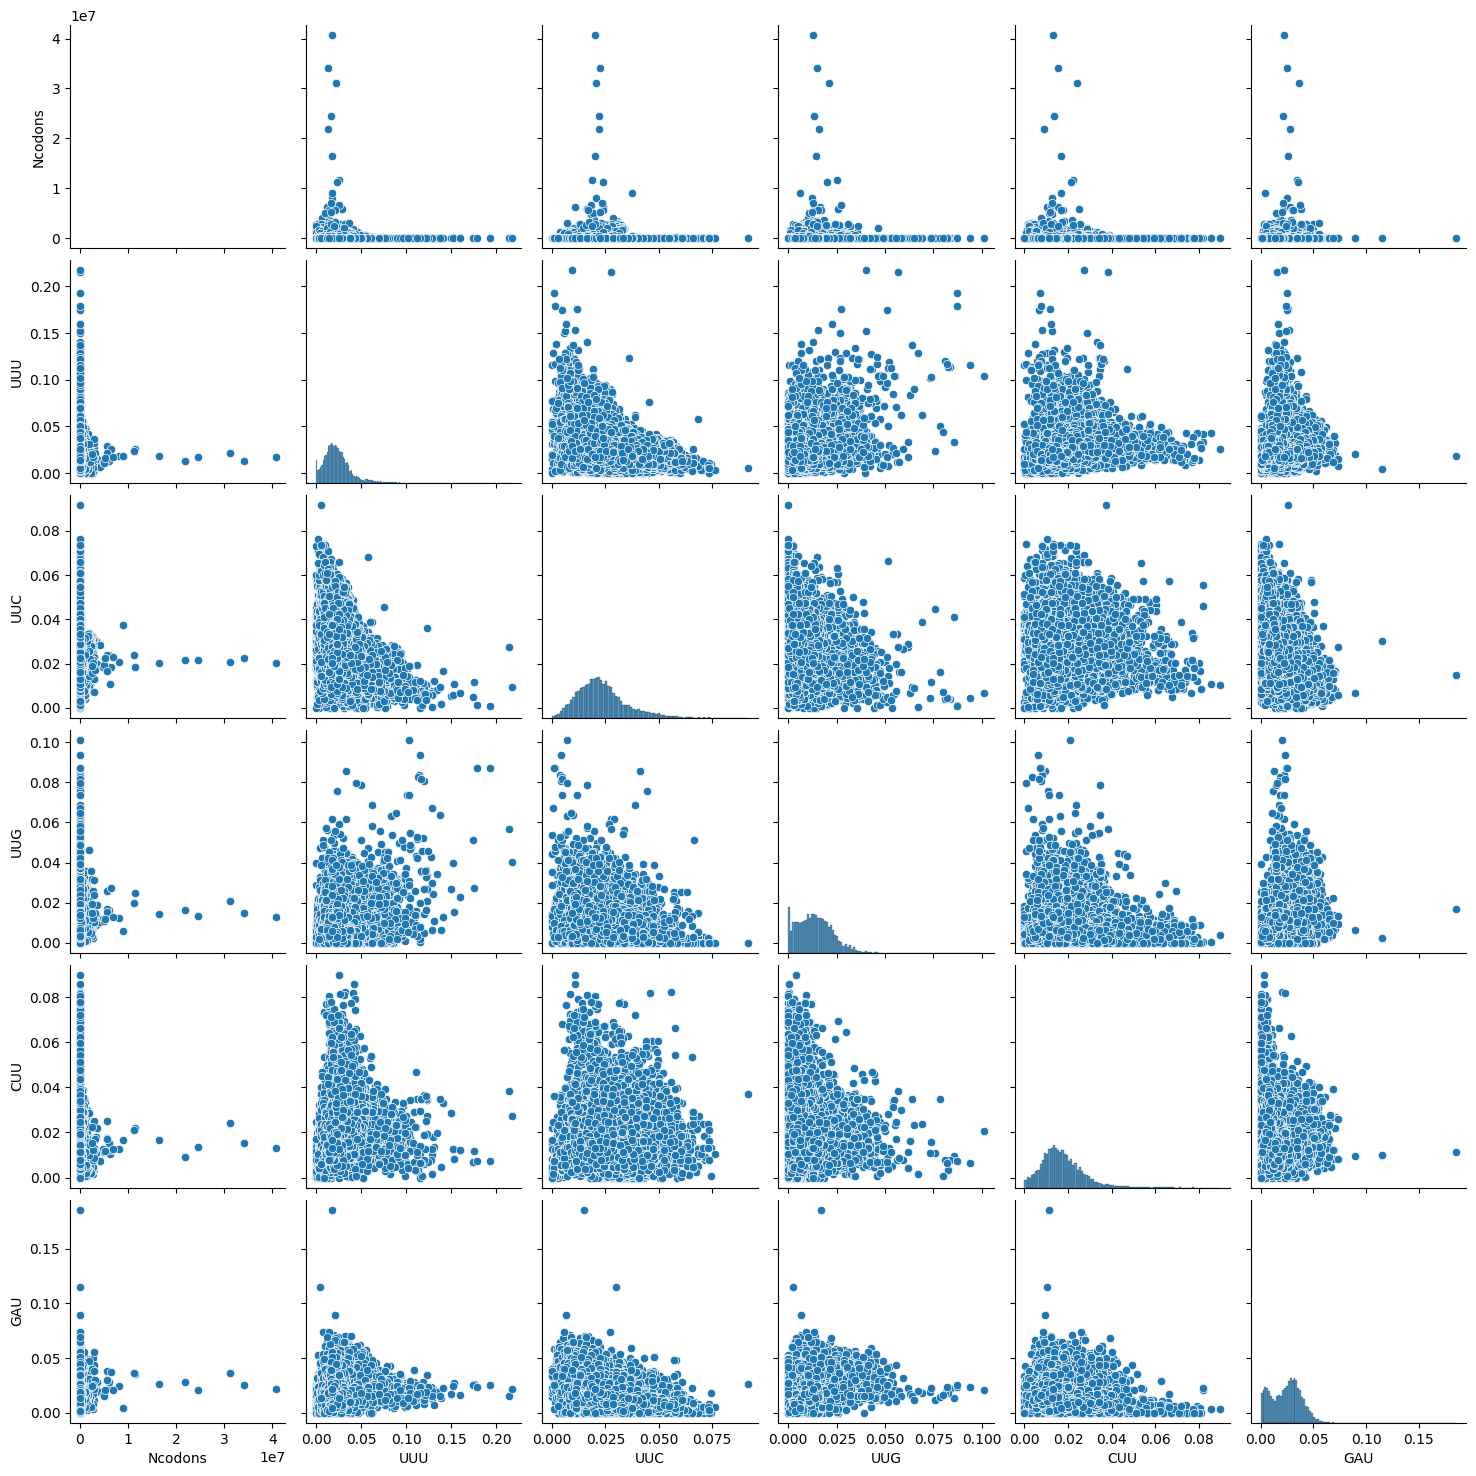

In [ ]:
selected_cols = ['Ncodons', 'UUU', 'UUC', 'UUG', 'CUU', 'GAU']
sns.pairplot(codon_usage[selected_cols])
plt.show()

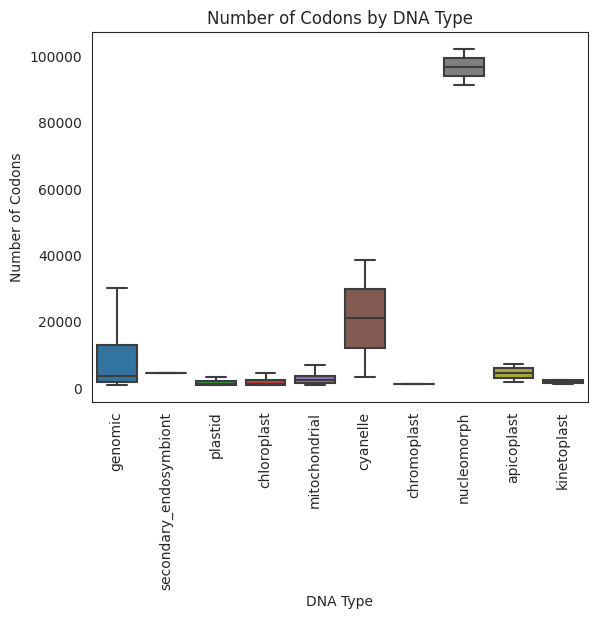

In [ ]:
#Boxplot
sns.set_style("white")
ax = sns.boxplot(x="DNAtype", y="Ncodons", data=codon_usage, showfliers=False)
ax.set(xlabel='DNA Type', ylabel='Number of Codons', title='Number of Codons by DNA Type')
plt.xticks(rotation=90)
plt.show()

**K-Means Clustering**

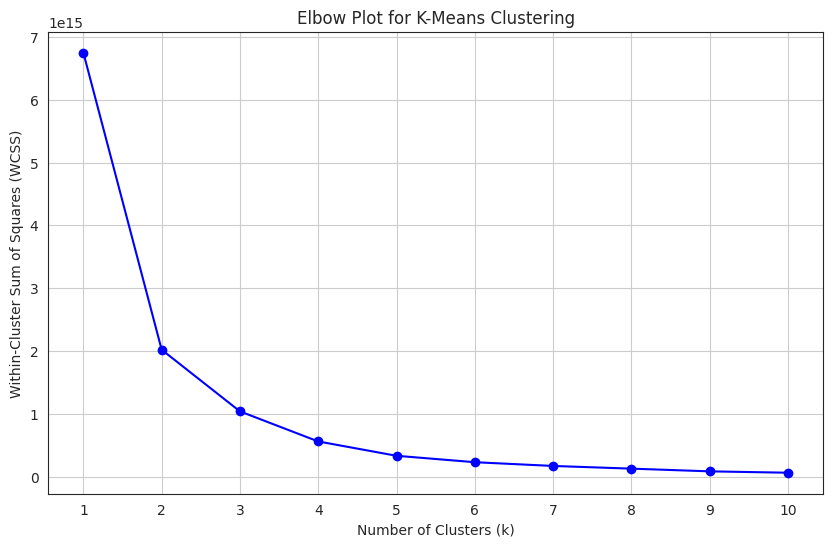

In [ ]:
from sklearn.cluster import KMeans

num_clusters = range(1, 11)

wcss = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(codon_usage_num)
    wcss.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Plot for K-Means Clustering')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()

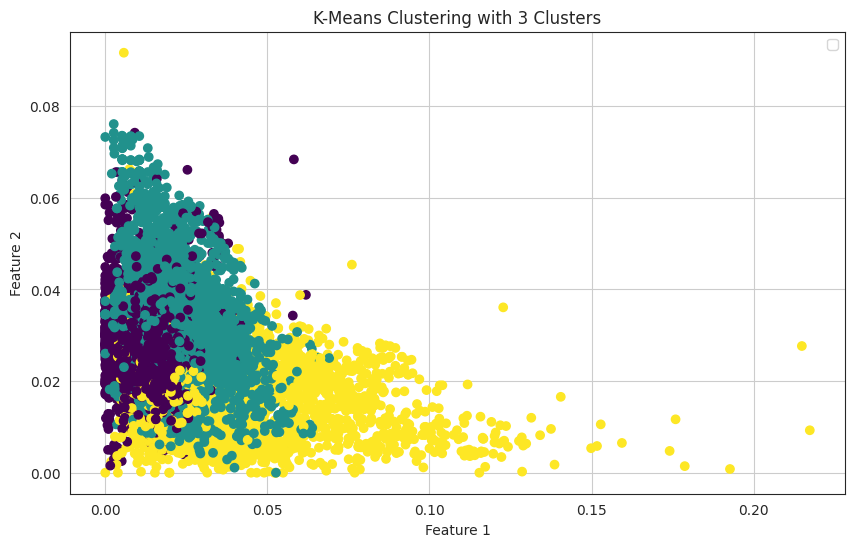

In [ ]:
features = codon_usage_num.iloc[:, 1:].to_numpy()
optimal_num_clusters = 3

kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10, random_state=42)
kmeans.fit(features)
cluster_labels = kmeans.labels_

# K-Means plot
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Means Clustering with {optimal_num_clusters} Clusters')
plt.legend()
plt.grid(True)
plt.show()

# 3. Modeling

**Data Splitting/scaling**

In [ ]:
#Split dataset to 0.8 training and 0.2 testing
drop_cols = ['DNAtype', 'SpeciesID', 'SpeciesName', 'Kingdom']
X = codon_usage.drop(columns=drop_cols)
y = codon_usage['DNAtype']
y_unique = np.unique(y)

# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Baseline Model**

In [ ]:
#find majority class, will predict that each entry equals this majority class
majority_class = codon_usage['DNAtype'].value_counts().idxmax()
total_samples = len(codon_usage)
baseline_accuracy = codon_usage['DNAtype'].value_counts()[majority_class] / total_samples
majority_predictions = [majority_class] * total_samples
f1_baseline = f1_score(codon_usage['DNAtype'], majority_predictions, average='weighted')

print(f"Weighted F1 score with majority class: {f1_baseline:.4f}")
print(f"Baseline accuracy: {baseline_accuracy:.4f}")
print(majority_class)

Weighted F1 score with majority class: 0.5914
Baseline accuracy: 0.7114
genomic


**Check for Multicollinearity**

Multicollinearity is concerning for various regression models, will remove high VIF values for any regression based models

In [ ]:
#need to add intercept to reduce bias/inflated VIF values
X_w_intercept = sm.add_constant(X)

# calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_w_intercept.columns
vif["VIF"] = [variance_inflation_factor(X_w_intercept.values, i) for i in range(X_w_intercept.shape[1])]

#subset features with moderate multicollinearity (VIF >= 5)
large_vif = vif[vif["VIF"] >= 5]
high_vif_features = large_vif[large_vif["VIF"] > 5]["Feature"]
X_train_vif_filtered = X_train.drop(columns=high_vif_features, errors = 'ignore')
X_test_vif_filtered = X_test.drop(columns=high_vif_features, errors = 'ignore')

print("Columns remaining after high VIF features removed: ", X_train_vif_filtered.shape[1])

Columns remaining after high VIF features removed:  45


**Logistic Regression Models**

Logistic Regression

In [ ]:
#using original train and test
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred)
print(f"Accuracy without original dataset: {accuracy_logreg:.5f}\n")

# generate confusion matrix for each class
print("Confusion matrices by class (Logistic Regression): \n")
mcm = multilabel_confusion_matrix(y_test, y_pred, labels=y_unique)


#add labels onto the confusion matrices
for i, label in enumerate(y_unique):
    print(f"Class {label}:")
    print(f"      Pred True   Pred False")
    print(f"Actual True  {mcm[i][1][1]}    {mcm[i][1][0]}")
    print(f"Actual False {mcm[i][0][1]}    {mcm[i][0][0]}")
    print("=" * 30)

Accuracy without original dataset: 0.71555

Confusion matrices by class (Logistic Regression): 

Class apicoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class chloroplast:
      Pred True   Pred False
Actual True  0    156
Actual False 0    2449
Class chromoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class cyanelle:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class genomic:
      Pred True   Pred False
Actual True  1864    0
Actual False 741    0
Class kinetoplast:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class mitochondrial:
      Pred True   Pred False
Actual True  0    578
Actual False 0    2027
Class nucleomorph:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class plastid:
      Pred True   Pred False
Actual True  0    5
Actual False 0    2600
Class secondary_endosymbiont:
      Pred True   Pred False
Actual True  0    0
Actual Fa

In [ ]:
f1_logreg = f1_score(y_test, y_pred, average='weighted')  # Calculate the weighted F1 score
print(f"Accuracy without high VIF features: {accuracy_logreg:.5f}")
print(f"Weighted F1 score: {f1_logreg:.5f}\n")

Accuracy without high VIF features: 0.71555
Weighted F1 score: 0.59690



Logistic Regression, excluding VIF >=5

In [ ]:
#use low vif train and test
logreg_lowvif = LogisticRegression(random_state=42)
logreg_lowvif.fit(X_train_vif_filtered, y_train)
y_pred = logreg_lowvif.predict(X_test_vif_filtered)
accuracy_lgr = accuracy_score(y_test, y_pred)
f1_lgr = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy without high VIF features: {accuracy_lgr:.5f} \n")
print(f"Weighted F1 score: {f1_lgr:.5f}\n")

# generate confusion matrix for each class
print("Confusion matrices by class (Logistic Regression - Excluding high VIF Features): \n")
mcm = multilabel_confusion_matrix(y_test, y_pred, labels=y_unique)
#add labels onto the confusion matrices
for i, label in enumerate(y_unique):
    print(f"Class {label}:")
    print(f"      Pred True   Pred False")
    print(f"Actual True  {mcm[i][1][1]}    {mcm[i][1][0]}")
    print(f"Actual False {mcm[i][0][1]}    {mcm[i][0][0]}")
    print("=" * 30)

Accuracy without high VIF features: 0.71555 

Weighted F1 score: 0.59690

Confusion matrices by class (Logistic Regression - Excluding high VIF Features): 

Class apicoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class chloroplast:
      Pred True   Pred False
Actual True  0    156
Actual False 0    2449
Class chromoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class cyanelle:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class genomic:
      Pred True   Pred False
Actual True  1864    0
Actual False 741    0
Class kinetoplast:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class mitochondrial:
      Pred True   Pred False
Actual True  0    578
Actual False 0    2027
Class nucleomorph:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class plastid:
      Pred True   Pred False
Actual True  0    5
Actual False 0    2600
Class secondary_endosymbiont

Ridge Regression

In [ ]:
logreg_l2 = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42)
logreg_l2.fit(X_train, y_train)
y_pred = logreg_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred)
print(f"Accuracy without high VIF features: {accuracy_l2:.5f}\n")

f1_logreg_l2 = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted F1 score: {f1_logreg_l2:.5f}\n")

# generate confusion matrix for each class
print("Confusion matrices by class (Ridge Regression): \n")
mcm = multilabel_confusion_matrix(y_test, y_pred, labels=y_unique)
#add labels onto the confusion matrices
for i, label in enumerate(y_unique):
    print(f"Class {label}:")
    print(f"      Pred True   Pred False")
    print(f"Actual True  {mcm[i][1][1]}    {mcm[i][1][0]}")
    print(f"Actual False {mcm[i][0][1]}    {mcm[i][0][0]}")
    print("=" * 30)

Accuracy without high VIF features: 0.71555

Weighted F1 score: 0.59690

Confusion matrices by class (Ridge Regression): 

Class apicoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class chloroplast:
      Pred True   Pred False
Actual True  0    156
Actual False 0    2449
Class chromoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class cyanelle:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class genomic:
      Pred True   Pred False
Actual True  1864    0
Actual False 741    0
Class kinetoplast:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class mitochondrial:
      Pred True   Pred False
Actual True  0    578
Actual False 0    2027
Class nucleomorph:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class plastid:
      Pred True   Pred False
Actual True  0    5
Actual False 0    2600
Class secondary_endosymbiont:
      Pred True   Pred False
Act

Lasso Regression


In [ ]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

#calculate accuracy
accuracy_l1 = accuracy_score(y_test, y_pred)
print(f"Accuracy of Lasso Regression: {accuracy_l1:.5f}\n")

f1_logreg_l1 = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted F1 score: {f1_logreg_l1:.5f}\n")

# generate confusion matrix for each class
print("Confusion matrices by class (Lasso Regression): \n")
mcm = multilabel_confusion_matrix(y_test, y_pred, labels=y_unique)
#add labels onto the confusion matrices
for i, label in enumerate(y_unique):
    print(f"Class {label}:")
    print(f"      Pred True   Pred False")
    print(f"Actual True  {mcm[i][1][1]}    {mcm[i][1][0]}")
    print(f"Actual False {mcm[i][0][1]}    {mcm[i][0][0]}")
    print("=" * 30)


Accuracy of Lasso Regression: 0.97889

Weighted F1 score: 0.97712

Confusion matrices by class (Lasso Regression): 

Class apicoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class chloroplast:
      Pred True   Pred False
Actual True  128    28
Actual False 9    2440
Class chromoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class cyanelle:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class genomic:
      Pred True   Pred False
Actual True  1860    4
Actual False 38    703
Class kinetoplast:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class mitochondrial:
      Pred True   Pred False
Actual True  562    16
Actual False 8    2019
Class nucleomorph:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class plastid:
      Pred True   Pred False
Actual True  0    5
Actual False 0    2600
Class secondary_endosymbiont:
      Pred True   Pred False
Actual

**K-Nearest Neighbors**

In [ ]:
#GridSearch CV
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 20)}
knn_grid = GridSearchCV(knn2, param_grid)
knn_grid.fit(X_train, y_train)

best_params = knn_grid.best_params_
knn_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
knn_best.fit(X_train, y_train)
knn_best_y_pred = knn_best.predict(X_test)
best_params

{'n_neighbors': 8}

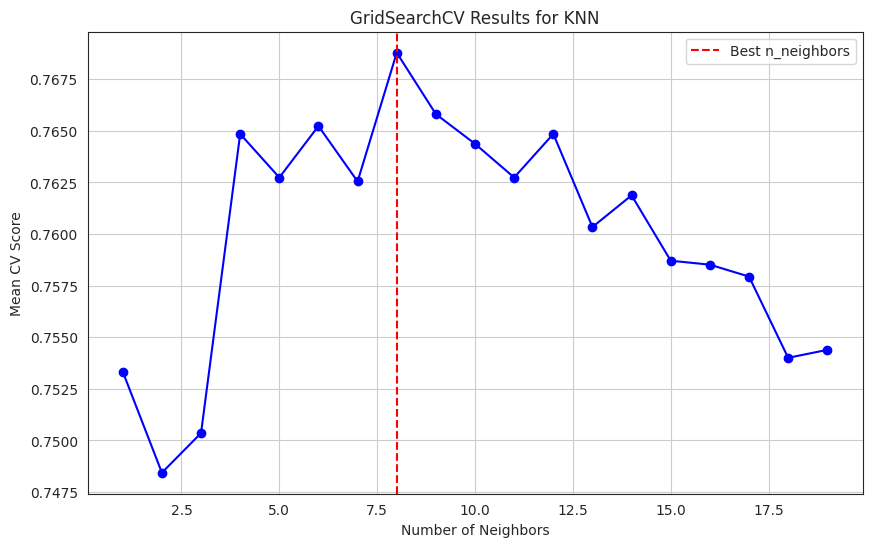

Best Parameters: {'n_neighbors': 8}


In [ ]:
mean_scores = knn_grid.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 20), mean_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean CV Score')
plt.title('GridSearchCV Results for KNN')
plt.axvline(x=best_params['n_neighbors'], color='r', linestyle='--', label='Best n_neighbors')
plt.legend()
plt.grid(True)
plt.show()

print("Best Parameters:", best_params)

In [ ]:
#calculate accuracy
accuracy_knn = accuracy_score(y_test, knn_best_y_pred)
print(f"Accuracy without high VIF features: {accuracy_knn:.5f}\n")

# generate confusion matrix for each class
print("Confusion matrices by class (K-Nearest Neighbor): \n")
mcm = multilabel_confusion_matrix(y_test, knn_best_y_pred, labels=y_unique)

f1_logreg_knn = f1_score(y_test, knn_best_y_pred, average='weighted')
print(f"Weighted F1 score: {f1_logreg_knn:.5f}\n")

#add labels onto the confusion matrices
for i, label in enumerate(y_unique):
    print(f"Class {label}:")
    print(f"      Pred True   Pred False")
    print(f"Actual True  {mcm[i][1][1]}    {mcm[i][1][0]}")
    print(f"Actual False {mcm[i][0][1]}    {mcm[i][0][0]}")
    print("=" * 30)


Accuracy without high VIF features: 0.78273

Confusion matrices by class (K-Nearest Neighbor): 

Weighted F1 score: 0.75639

Class apicoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class chloroplast:
      Pred True   Pred False
Actual True  74    82
Actual False 43    2406
Class chromoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class cyanelle:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class genomic:
      Pred True   Pred False
Actual True  1763    101
Actual False 450    291
Class kinetoplast:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class mitochondrial:
      Pred True   Pred False
Actual True  202    376
Actual False 73    1954
Class nucleomorph:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class plastid:
      Pred True   Pred False
Actual True  0    5
Actual False 0    2600
Class secondary_endosymbiont:
      Pred True   Pred

**Decision Tree with Varying MaxDepths**

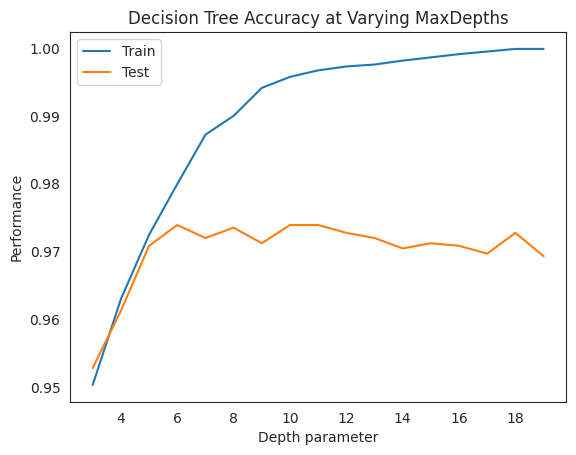

In [ ]:
warnings.filterwarnings('ignore')
train_errors = list()
test_errors = list()

for max_depth in range(3,20): #specify range
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_errors.append(accuracy_score(y_train,y_pred_train))
    test_errors.append(accuracy_score(y_test,y_pred_test))

plt.plot(range(3,20),train_errors, label='Train')
plt.plot(range(3,20),test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')
plt.title('Decision Tree Accuracy at Varying MaxDepths')
plt.show()


Select the depth that had the highest test accuracy to generate the optimal tree



In [ ]:
tree_results = pd.DataFrame({'Depth Parameter': range(3, 20), 'Train Errors' : train_errors,
                             'Test Errors': test_errors})
max_test_accuracy_depth = tree_results['Depth Parameter'].iloc[tree_results['Test Errors'].idxmax()]
print("optimal depth parameter: ", max_test_accuracy_depth)

clf_optimal = DecisionTreeClassifier(max_depth=max_test_accuracy_depth, random_state=42)
clf_optimal = clf_optimal.fit(X_train,y_train)
y_pred = clf_optimal.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred)
f1_tree_opt = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy_tree:.5f} \n")
print(f"Weighted F1 score: {f1_tree_opt:.5f}\n")

optimal depth parameter:  6
Accuracy: 0.97313 

Weighted F1 score: 0.97211



Visualize decision tree - only showing the first 2 splits because otherwise the figure becomes unreadable

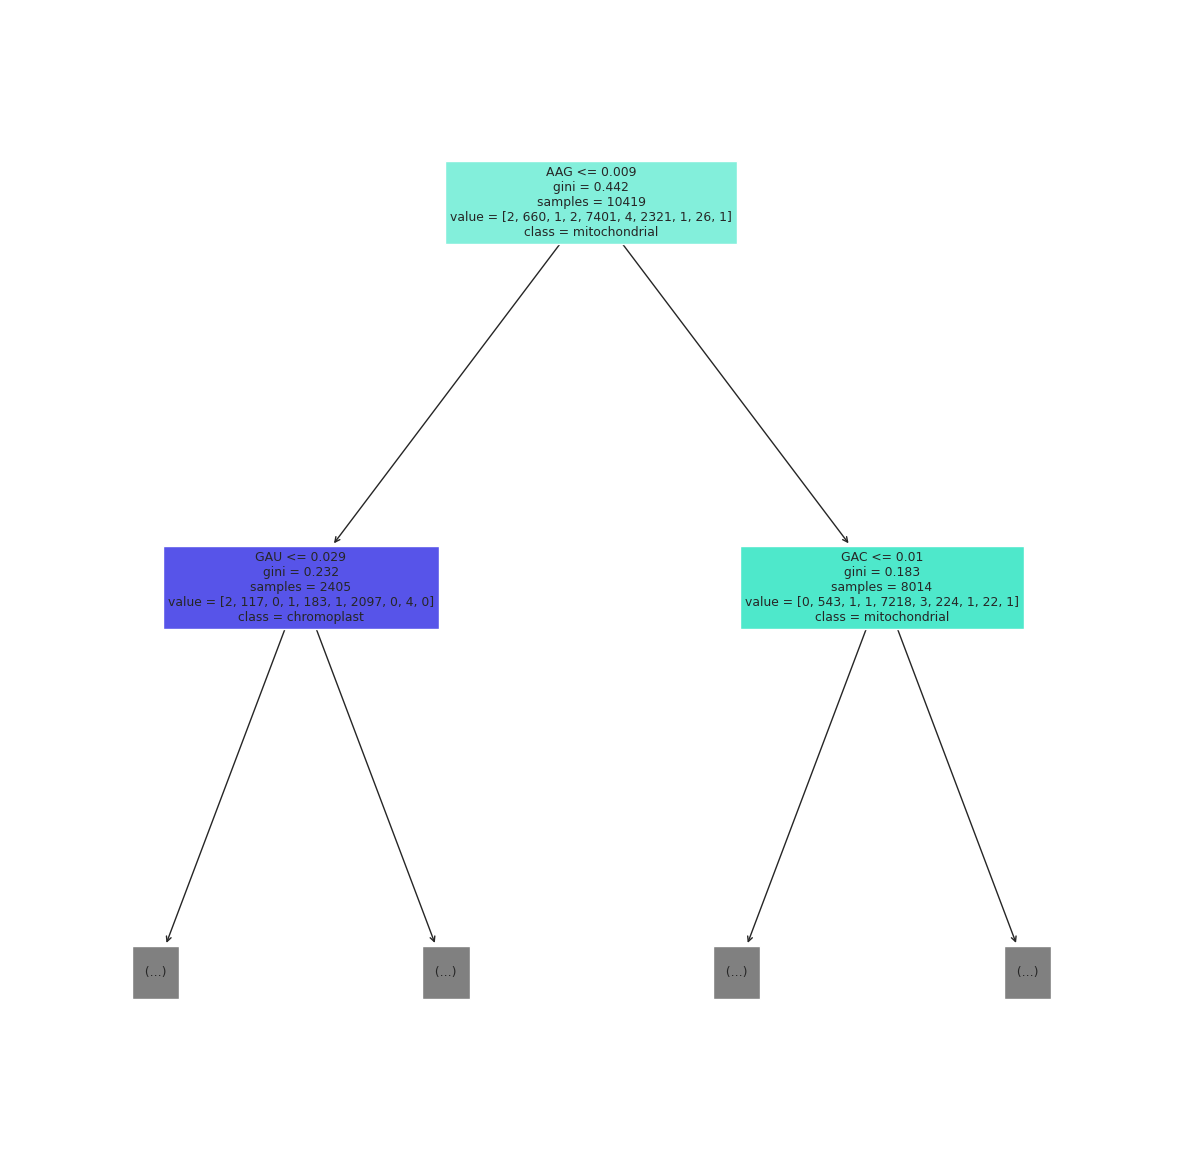

In [ ]:
feature_names = X_train.columns
target_names = codon_usage['DNAtype'].unique().tolist()

plt.figure(figsize=(15, 15))
plot_tree(clf_optimal, filled=True, feature_names=feature_names, class_names=target_names, max_depth=1)
plt.show()

In [ ]:
# generate confusion matrix for each class
print("Confusion matrices by class (Decision Tree): \n")
mcm = multilabel_confusion_matrix(y_test, y_pred, labels=y_unique)
#add labels onto the confusion matrices
for i, label in enumerate(y_unique):
    print(f"Class {label}:")
    print(f"      Pred True   Pred False")
    print(f"Actual True  {mcm[i][1][1]}    {mcm[i][1][0]}")
    print(f"Actual False {mcm[i][0][1]}    {mcm[i][0][0]}")
    print("=" * 30)


Confusion matrices by class (Decision Tree): 

Class apicoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class chloroplast:
      Pred True   Pred False
Actual True  136    20
Actual False 26    2423
Class chromoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class cyanelle:
      Pred True   Pred False
Actual True  0    0
Actual False 1    2604
Class genomic:
      Pred True   Pred False
Actual True  1843    21
Actual False 32    709
Class kinetoplast:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class mitochondrial:
      Pred True   Pred False
Actual True  556    22
Actual False 11    2016
Class nucleomorph:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class plastid:
      Pred True   Pred False
Actual True  0    5
Actual False 0    2600
Class secondary_endosymbiont:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605


**Random Forest Model**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Initial Random Forest Accuracy: {accuracy_rf:.2f}")

f1_RF = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 score: {f1_RF:.5f}\n")

Initial Random Forest Accuracy: 0.99
Weighted F1 score: 0.98794



Tune number of estimators

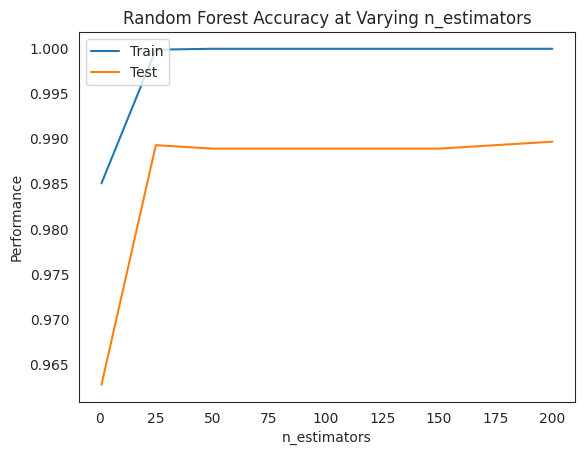

In [ ]:
# Create an empty list to store the results
test_errors = []
train_errors = []

n_estimators_tune = [1,25,50,100,150,200]

# Loop through different number of estimators
for n_estimators in n_estimators_tune:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)
    train_errors.append(accuracy_score(y_train,y_pred_train))
    test_errors.append(accuracy_score(y_test,y_pred_test))

plt.plot(n_estimators_tune,train_errors, label='Train')
plt.plot(n_estimators_tune,test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('n_estimators')
plt.ylabel('Performance')
plt.title('Random Forest Accuracy at Varying n_estimators')
plt.show()

Select the depth that had the highest test accuracy to generate the optimal tree

In [ ]:
rf_results = pd.DataFrame({'n_estimators': n_estimators_tune, 'Train Errors' : train_errors,
                             'Test Errors': test_errors})

max_test_accuracy_estimators = rf_results['n_estimators'].iloc[rf_results['Test Errors'].idxmax()]
print("optimal n_estimators: ", max_test_accuracy_estimators)

rf_optimal = RandomForestClassifier(n_estimators=max_test_accuracy_estimators, random_state=42)
rf_optimal = rf_optimal.fit(X_train,y_train)
y_pred = rf_optimal.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.5f} \n")

f1_RF_opt = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 score: {f1_RF_opt:.5f}\n")

# generate confusion matrix for each class
print("Confusion matrices by class (Random Forest Model): \n")
mcm = multilabel_confusion_matrix(y_test, y_pred, labels=y_unique)
#add labels onto the confusion matrices
for i, label in enumerate(y_unique):
    print(f"Class {label}:")
    print(f"      Pred True   Pred False")
    print(f"Actual True  {mcm[i][1][1]}    {mcm[i][1][0]}")
    print(f"Actual False {mcm[i][0][1]}    {mcm[i][0][0]}")



optimal n_estimators:  200
Accuracy: 0.98964 

Weighted F1 score: 0.98871

Confusion matrices by class (Random Forest Model): 

Class apicoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class chloroplast:
      Pred True   Pred False
Actual True  148    8
Actual False 5    2444
Class chromoplast:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class cyanelle:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class genomic:
      Pred True   Pred False
Actual True  1862    2
Actual False 18    723
Class kinetoplast:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class mitochondrial:
      Pred True   Pred False
Actual True  567    11
Actual False 4    2023
Class nucleomorph:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class plastid:
      Pred True   Pred False
Actual True  1    4
Actual False 0    2600
Class secondary_endosymbiont:
      Pred True   Pred Fa

**Initial XGBoost**

In [ ]:
#Encoding y
#Split dataset to 0.8 training and 0.2 testing
drop_cols = ['DNAtype', 'SpeciesID', 'SpeciesName', 'Kingdom']
X = codon_usage.drop(columns=drop_cols)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
y_unique2 = np.unique(y_encoded)

In [ ]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train2, y_train2)
xgb_y_pred = xgb_classifier.predict(X_test2)
xgb_init_accuracy = accuracy_score(y_test2, xgb_y_pred)
print("Accuracy:", xgb_init_accuracy)

f1_init_XGB = f1_score(y_test2, xgb_y_pred, average='weighted')
print(f"Weighted F1 score: {f1_init_XGB:.5f}\n")

Accuracy: 0.9907869481765835
Weighted F1 score: 0.98992



Cross-Validated XGBoost

In [ ]:
#CV to fix overfitting
from sklearn.model_selection import RandomizedSearchCV
xgb_classifier2 = xgb.XGBClassifier(random_state=42)
xgb_param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.05, 0.1]
}

xgb_random_search = RandomizedSearchCV(
    xgb_classifier,
    param_distributions=xgb_param_grid,
    n_iter=10,
    cv=5,
    n_jobs=-1
)

xgb_random_search.fit(X_train2, y_train2)
best_xgb_model = xgb_random_search.best_estimator_
print("Best hyperparameters for the XGBoost model:")
print(xgb_random_search.best_params_)

Best hyperparameters for the XGBoost model:
{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


In [ ]:
best_xgb_model.fit(X_train2, y_train2)
y_pred2 = best_xgb_model.predict(X_test2)

In [ ]:
# generate confusion matrix for each class
xgb_accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", xgb_accuracy)

f1_cv_XGB = f1_score(y_test2, y_pred2, average='weighted')
print(f"Weighted F1 score: {f1_cv_XGB:.5f}\n")

print("Confusion matrices by class (Tuned XGBoost Model): \n")
mcm = multilabel_confusion_matrix(y_test2, y_pred2, labels=y_unique2)
#add labels onto the confusion matrices
for i, label in enumerate(y_unique2):
    print(f"Class {label}:")
    print(f"      Pred True   Pred False")
    print(f"Actual True  {mcm[i][1][1]}    {mcm[i][1][0]}")
    print(f"Actual False {mcm[i][0][1]}    {mcm[i][0][0]}")
    print("=" * 30)

Accuracy: 0.9846449136276392
Weighted F1 score: 0.98322

Confusion matrices by class (Tuned XGBoost Model): 

Class 0:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class 1:
      Pred True   Pred False
Actual True  143    13
Actual False 6    2443
Class 2:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class 3:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605
Class 4:
      Pred True   Pred False
Actual True  1859    5
Actual False 28    713
Class 5:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class 6:
      Pred True   Pred False
Actual True  563    15
Actual False 6    2021
Class 7:
      Pred True   Pred False
Actual True  0    1
Actual False 0    2604
Class 8:
      Pred True   Pred False
Actual True  0    5
Actual False 0    2600
Class 9:
      Pred True   Pred False
Actual True  0    0
Actual False 0    2605


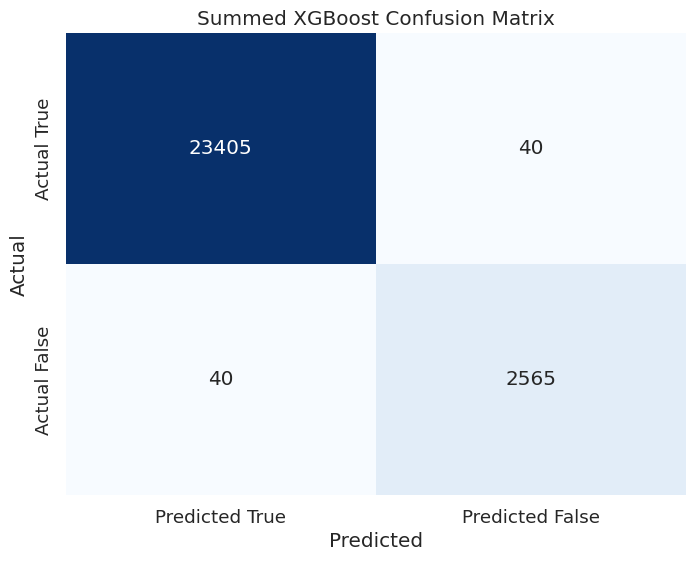

In [ ]:
summed_confusion_matrix = np.sum(mcm, axis=0)

# Plot the summed confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(summed_confusion_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted True', 'Predicted False'],
            yticklabels=['Actual True', 'Actual False'])
plt.title('Summed XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Results Summary

In [ ]:
data = [["Baseline", baseline_accuracy, f1_baseline],
        ["Logistic", accuracy_lgr, f1_lgr],
        ["Ridge", accuracy_l2, f1_logreg_l2],
        ["Lasso", accuracy_l1, f1_logreg_l1],
        ["K-nearest neighbor", accuracy_knn, f1_logreg_knn],
        ["Decision Tree", accuracy_tree, f1_tree_opt],
        ["Random Forest", accuracy_rf, f1_RF_opt],
        ["XG Boost", xgb_accuracy, f1_cv_XGB]]

headers = ['Model', 'Accuracy', 'F1-Score']
print(tabulate(data, headers=headers, tablefmt='grid'))

+--------------------+------------+------------+
| Model              |   Accuracy |   F1-Score |
+====================+============+============+
| Baseline           |   0.711379 |   0.591406 |
+--------------------+------------+------------+
| Logistic           |   0.715547 |   0.596903 |
+--------------------+------------+------------+
| Ridge              |   0.715547 |   0.596903 |
+--------------------+------------+------------+
| Lasso              |   0.978887 |   0.977123 |
+--------------------+------------+------------+
| K-nearest neighbor |   0.782726 |   0.756395 |
+--------------------+------------+------------+
| Decision Tree      |   0.973129 |   0.972113 |
+--------------------+------------+------------+
| Random Forest      |   0.989635 |   0.988714 |
+--------------------+------------+------------+
| XG Boost           |   0.984645 |   0.983225 |
+--------------------+------------+------------+


(13024, 58)

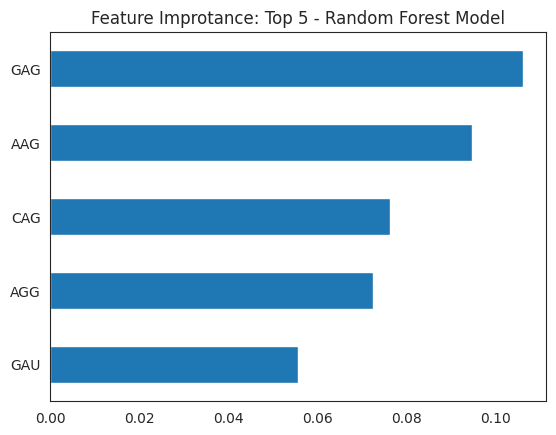

In [ ]:
pd.Series(rf.feature_importances_, index=X.columns).nlargest(5).plot(kind='barh').invert_yaxis()
plt.title("Feature Improtance: Top 5 - Random Forest Model")
X.shape